# Transformation

In [429]:
# Imports
import pandas as pd

In [430]:
# Paths
films_path = "../extraction/extracted_data/films_data.csv"
oscars_path = "../extraction/extracted_data/oscars_data.csv"
streaming_path = "../extraction/extracted_data/streaming_data.csv"

films_df = pd.read_csv(films_path)
oscars_df = pd.read_csv(oscars_path)
streaming_df = pd.read_csv(streaming_path)

In [431]:
films_df.head()


,title,year,rating,genres,runtime,director,budget,imdb_id
0,A Complete Unknown,2024,7.3,"['Biography', 'Drama', 'Music']",['141'],"['James Mangold', 'Yesi Ramirez']",NaN,11563598
1,Nickel Boys,2024,6.9,['Drama'],['140'],"['RaMell Ross', 'Victoria Thomas']",NaN,23055660
2,I'm Still Here,2024,8.1,"['Biography', 'Drama', 'History']",['137'],"['Walter Salles', 'Leticia Naveira']",NaN,14961016
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",['20'],"['Hossein Molayemi', 'Shirin Sohani']",NaN,28768883
4,The Substance,2024,7.2,"['Drama', 'Horror', 'Sci-Fi']","['141', '139']","['Coralie Fargeat', 'Laure Cochener']",NaN,17526714


In [432]:
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     50 non-null     object 
 1   year      50 non-null     int64  
 2   rating    50 non-null     float64
 3   genres    50 non-null     object 
 4   runtime   50 non-null     object 
 5   director  50 non-null     object 
 6   budget    0 non-null      float64
 7   imdb_id   50 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ KB


In [433]:
films_clean = films_df.copy()
films_clean = films_clean.drop_duplicates()
films_clean.columns = films_clean.columns.str.lower().str.replace(" ", "_")
films_clean.isna().sum()


title        0
year         0
rating       0
genres       0
runtime      0
director     0
budget      50
imdb_id      0
dtype: int64

In [434]:
# #removing budget no data for film budget all NaN
films_clean = films_clean.drop(columns=['budget'])
films_clean.columns



Index(['title', 'year', 'rating', 'genres', 'runtime', 'director', 'imdb_id'], dtype='object')

In [435]:
films_clean["runtime"].head()


0           ['141']
1           ['140']
2           ['137']
3            ['20']
4    ['141', '139']
Name: runtime, dtype: object

In [436]:

films_clean[~films_clean["runtime"].str.replace(r"[\[\]]", "", regex=True).str.isnumeric()]


,title,year,rating,genres,runtime,director,imdb_id
0,A Complete Unknown,2024,7.3,"['Biography', 'Drama', 'Music']",['141'],"['James Mangold', 'Yesi Ramirez']",11563598
1,Nickel Boys,2024,6.9,['Drama'],['140'],"['RaMell Ross', 'Victoria Thomas']",23055660
2,I'm Still Here,2024,8.1,"['Biography', 'Drama', 'History']",['137'],"['Walter Salles', 'Leticia Naveira']",14961016
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",['20'],"['Hossein Molayemi', 'Shirin Sohani']",28768883
4,The Substance,2024,7.2,"['Drama', 'Horror', 'Sci-Fi']","['141', '139']","['Coralie Fargeat', 'Laure Cochener']",17526714
5,Dune: Part Two,2024,8.4,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",['166'],"['Denis Villeneuve', 'Francine Maisler']",15239678
6,Beurk !,2024,6.7,"['Animation', 'Short', 'Family']",['13'],"['Loïc Espuche', 'Florian Delhormeau']",28356173
7,Beautiful Men,2023,6.0,"['Animation', 'Short', 'Comedy', 'Drama']",['19'],['Nicolas Keppens'],30835281
8,Soundtrack to a Coup d'Etat,2024,7.8,"['Documentary', 'Music']",['150'],['Johan Grimonprez'],14452174
9,Magic Candies,2024,7.1,"['Animation', 'Short', 'Family', 'Fantasy']",['20'],['Daisuke Nishio'],31888603


In [437]:
#removing longer runtime, assuming one is the directors cut and another theoretical directors cut are always longer.

films_clean["runtime_theatrical"] = ( films_clean["runtime"].astype(str).str.findall(r"\d+").apply(lambda x: min(map(int, x)) 
    if x else None).astype(float)
)

films_clean[["runtime", "runtime_theatrical"]].head()


,runtime,runtime_theatrical
0,['141'],141.0
1,['140'],140.0
2,['137'],137.0
3,['20'],20.0
4,"['141', '139']",139.0


In [438]:
# drop missing
films_clean = films_clean.dropna(subset=["runtime_theatrical"])
films_clean["runtime"] = films_clean["runtime_theatrical"]
films_clean = films_clean.drop(columns=["runtime_theatrical"])

films_clean.columns
films_clean.head()



,title,year,rating,genres,runtime,director,imdb_id
0,A Complete Unknown,2024,7.3,"['Biography', 'Drama', 'Music']",141.0,"['James Mangold', 'Yesi Ramirez']",11563598
1,Nickel Boys,2024,6.9,['Drama'],140.0,"['RaMell Ross', 'Victoria Thomas']",23055660
2,I'm Still Here,2024,8.1,"['Biography', 'Drama', 'History']",137.0,"['Walter Salles', 'Leticia Naveira']",14961016
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",20.0,"['Hossein Molayemi', 'Shirin Sohani']",28768883
4,The Substance,2024,7.2,"['Drama', 'Horror', 'Sci-Fi']",139.0,"['Coralie Fargeat', 'Laure Cochener']",17526714


In [439]:
films_clean["runtime"].describe()


count     50.000000
mean      93.180000
std       51.884758
min       13.000000
25%       33.250000
50%      102.000000
75%      134.250000
max      201.000000
Name: runtime, dtype: float64

In [440]:
films_clean.sort_values("runtime").head(20)
## seems to be some short films about 15 of them maybe we should remove


,title,year,rating,genres,runtime,director,imdb_id
6,Beurk !,2024,6.7,"['Animation', 'Short', 'Family']",13.0,"['Loïc Espuche', 'Florian Delhormeau']",28356173
20,Wander to Wonder,2023,6.7,"['Animation', 'Short', 'Comedy', 'Thriller']",14.0,['Nina Gantz'],28768679
30,The Man Who Could Not Remain Silent,2024,7.3,"['Short', 'Drama', 'History']",14.0,"['Nebojsa Slijepcevic', 'Hana Hribar']",20519854
44,A Lien,2023,7.2,"['Short', 'Drama']",15.0,"['David Cutler-Kreutz', 'Sam Cutler-Kreutz']",27655666
7,Beautiful Men,2023,6.0,"['Animation', 'Short', 'Comedy', 'Drama']",19.0,['Nicolas Keppens'],30835281
3,In the Shadow of the Cypress,2023,7.0,"['Animation', 'Short', 'Drama', 'War']",20.0,"['Hossein Molayemi', 'Shirin Sohani']",28768883
9,Magic Candies,2024,7.1,"['Animation', 'Short', 'Family', 'Fantasy']",20.0,['Daisuke Nishio'],31888603
14,Anuja,2024,6.6,"['Short', 'Drama']",22.0,"['Adam J. Graves', 'Romil Modi']",27654431
21,Instruments of a Beating Heart,2024,7.0,"['Documentary', 'Short', 'Music']",23.0,['Ema Ryan Yamazaki'],32280470
22,I'm Not a Robot,2023,7.1,"['Short', 'Comedy', 'Drama', 'Fantasy', 'Sci-Fi']",23.0,['Victoria Warmerdam'],19837932


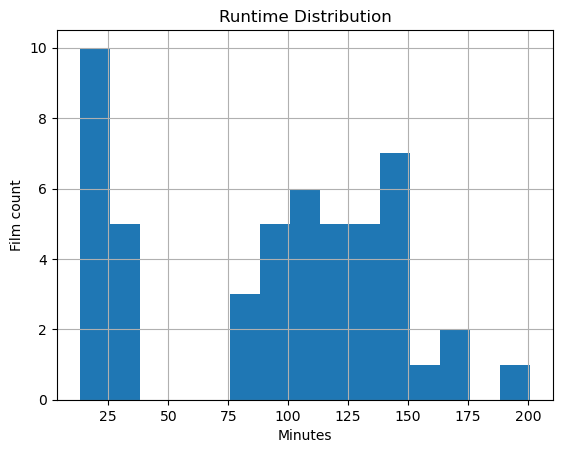

In [441]:
import matplotlib.pyplot as plt

films_clean["runtime"].hist(bins=15)
plt.title("Runtime Distribution")
plt.xlabel("Minutes")
plt.ylabel("Film count")
plt.show()


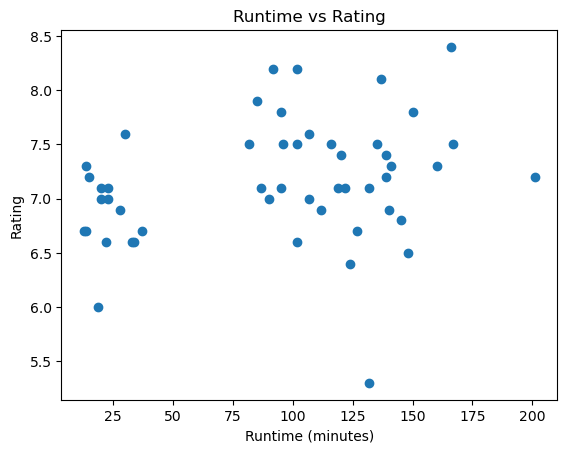

In [442]:
plt.scatter(films_clean["runtime"], films_clean["rating"])
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.title("Runtime vs Rating")
plt.show()


In [443]:
films_clean["runtime"].corr(films_clean["rating"])

0.25606621949723074

In [444]:
import ast

films_clean["genres"] = films_clean["genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

films_clean["director"] = films_clean["director"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

films_clean.head()


,title,year,rating,genres,runtime,director,imdb_id
0,A Complete Unknown,2024,7.3,"[Biography, Drama, Music]",141.0,"[James Mangold, Yesi Ramirez]",11563598
1,Nickel Boys,2024,6.9,[Drama],140.0,"[RaMell Ross, Victoria Thomas]",23055660
2,I'm Still Here,2024,8.1,"[Biography, Drama, History]",137.0,"[Walter Salles, Leticia Naveira]",14961016
3,In the Shadow of the Cypress,2023,7.0,"[Animation, Short, Drama, War]",20.0,"[Hossein Molayemi, Shirin Sohani]",28768883
4,The Substance,2024,7.2,"[Drama, Horror, Sci-Fi]",139.0,"[Coralie Fargeat, Laure Cochener]",17526714


In [445]:
films_clean.columns = films_clean.columns.str.strip().str.lower().str.replace(" ", "_")
films_clean.columns


Index(['title', 'year', 'rating', 'genres', 'runtime', 'director', 'imdb_id'], dtype='object')

In [447]:
dup_imdb = films_clean.duplicated(subset=["imdb_id"]).sum()
print("Duplicate imdb_id:", dup_imdb)



Duplicate imdb_id: 0


In [448]:
films_clean["title"] = films_clean["title"].astype(str).str.strip()
films_clean["year"] = films_clean["year"].astype(int)
films_clean["rating"] = films_clean["rating"].astype(float)
films_clean["runtime"] = films_clean["runtime"].astype(int)

films_clean["imdb_id"] = films_clean["imdb_id"].astype(str).str.strip()


In [508]:


def ensure_list(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        return ast.literal_eval(x)
    return []

films_clean["genres"] = films_clean["genres"].apply(ensure_list)
films_clean["director"] = films_clean["director"].apply(ensure_list)


In [450]:
films_clean["genres"] = films_clean["genres"].apply(lambda xs: [s.strip() for s in xs if str(s).strip() != ""])
films_clean["director"] = films_clean["director"].apply(lambda xs: [s.strip() for s in xs if str(s).strip() != ""])


In [451]:
films_clean["rating_out_of_range"] = (films_clean["rating"] < 0) | (films_clean["rating"] > 10)
films_clean["runtime_suspicious"] = (films_clean["runtime"] < 60) | (films_clean["runtime"] > 240)

films_clean[["title", "rating", "runtime", "rating_out_of_range", "runtime_suspicious"]].head(10)


,title,rating,runtime,rating_out_of_range,runtime_suspicious
0,A Complete Unknown,7.3,141,False,False
1,Nickel Boys,6.9,140,False,False
2,I'm Still Here,8.1,137,False,False
3,In the Shadow of the Cypress,7.0,20,False,True
4,The Substance,7.2,139,False,False
5,Dune: Part Two,8.4,166,False,False
6,Beurk !,6.7,13,False,True
7,Beautiful Men,6.0,19,False,True
8,Soundtrack to a Coup d'Etat,7.8,150,False,False
9,Magic Candies,7.1,20,False,True


In [452]:
films_clean[films_clean["runtime_suspicious"]][["title", "year", "runtime", "rating"]].sort_values("runtime")


,title,year,runtime,rating
6,Beurk !,2024,13,6.7
20,Wander to Wonder,2023,14,6.7
30,The Man Who Could Not Remain Silent,2024,14,7.3
44,A Lien,2023,15,7.2
7,Beautiful Men,2023,19,6.0
3,In the Shadow of the Cypress,2023,20,7.0
9,Magic Candies,2024,20,7.1
14,Anuja,2024,22,6.6
21,Instruments of a Beating Heart,2024,23,7.0
22,I'm Not a Robot,2023,23,7.1


In [453]:
films_table = films_clean[["imdb_id", "title", "year", "rating", "runtime"]].copy()
films_table.head()


,imdb_id,title,year,rating,runtime
0,11563598,A Complete Unknown,2024,7.3,141
1,23055660,Nickel Boys,2024,6.9,140
2,14961016,I'm Still Here,2024,8.1,137
3,28768883,In the Shadow of the Cypress,2023,7.0,20
4,17526714,The Substance,2024,7.2,139


In [454]:
film_genres = (
    films_clean[["imdb_id", "genres"]]
    .explode("genres")
    .rename(columns={"genres": "genre"})
    .dropna(subset=["genre"])
)

film_genres["genre"] = film_genres["genre"].astype(str).str.strip()
film_genres.head()


,imdb_id,genre
0,11563598,Biography
0,11563598,Drama
0,11563598,Music
1,23055660,Drama
2,14961016,Biography


In [455]:
film_directors = (
    films_clean[["imdb_id", "director"]]
    .explode("director")
    .rename(columns={"director": "director_name"})
    .dropna(subset=["director_name"])
)

film_directors["director_name"] = film_directors["director_name"].astype(str).str.strip()
film_directors.head()


,imdb_id,director_name
0,11563598,James Mangold
0,11563598,Yesi Ramirez
1,23055660,RaMell Ross
1,23055660,Victoria Thomas
2,14961016,Walter Salles


In [456]:
print("films_table:", films_table.shape)
print("film_genres:", film_genres.shape)
print("film_directors:", film_directors.shape)

print("Missing imdb_id in films_table:", films_table["imdb_id"].isna().sum())
print("Duplicate imdb_id in films_table:", films_table["imdb_id"].duplicated().sum())


films_table: (50, 5)
film_genres: (146, 2)
film_directors: (78, 2)
Missing imdb_id in films_table: 0
Duplicate imdb_id in films_table: 0


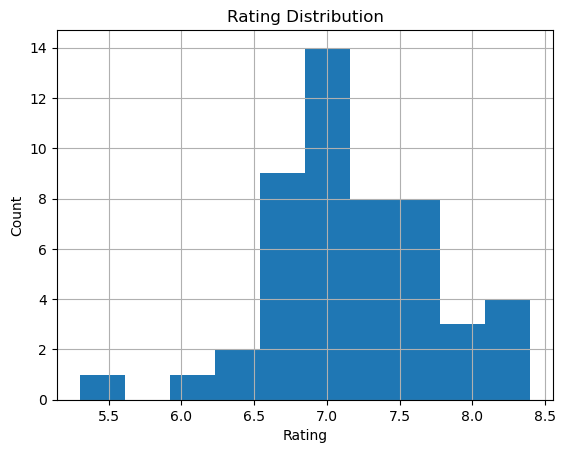

In [457]:
films_clean["rating"].hist(bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [458]:
oscars_df.head()

,Ceremony,Year,Class,CanonicalCategory,Category,NomId,Film,FilmId,Name,Nominees,NomineeIds,Winner,Detail,Note,Citation,MultifilmNomination,YearStart
0,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid012,The Brutalist,tt8999762,Adrien Brody,Adrien Brody,nm0004778,True,László Tóth,NaN,NaN,NaN,2024
1,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid010,A Complete Unknown,tt11563598,Timothée Chalamet,Timothée Chalamet,nm3154303,NaN,Bob Dylan,NaN,NaN,NaN,2024
2,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid013,Sing Sing,tt28479262,Colman Domingo,Colman Domingo,nm0231458,NaN,Divine G,NaN,NaN,NaN,2024
3,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid011,Conclave,tt20215234,Ralph Fiennes,Ralph Fiennes,nm0000146,NaN,Lawrence,NaN,NaN,NaN,2024
4,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid014,The Apprentice,tt8368368,Sebastian Stan,Sebastian Stan,nm1659221,NaN,Donald Trump,NaN,NaN,NaN,2024


In [459]:
oscars_df.shape
oscars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ceremony             120 non-null    int64  
 1   Year                 120 non-null    int64  
 2   Class                120 non-null    object 
 3   CanonicalCategory    120 non-null    object 
 4   Category             120 non-null    object 
 5   NomId                120 non-null    object 
 6   Film                 120 non-null    object 
 7   FilmId               120 non-null    object 
 8   Name                 120 non-null    object 
 9   Nominees             115 non-null    object 
 10  NomineeIds           115 non-null    object 
 11  Winner               23 non-null     object 
 12  Detail               25 non-null     object 
 13  Note                 0 non-null      float64
 14  Citation             0 non-null      float64
 15  MultifilmNomination  0 non-null      flo

In [460]:
oscars_clean = oscars_df.copy()


In [461]:
oscars_clean.columns = (oscars_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

oscars_clean.columns


Index(['ceremony', 'year', 'class', 'canonicalcategory', 'category', 'nomid',
       'film', 'filmid', 'name', 'nominees', 'nomineeids', 'winner', 'detail',
       'note', 'citation', 'multifilmnomination', 'yearstart'],
      dtype='object')

In [462]:
oscars_clean.isna().sum()


ceremony                 0
year                     0
class                    0
canonicalcategory        0
category                 0
nomid                    0
film                     0
filmid                   0
name                     0
nominees                 5
nomineeids               5
winner                  97
detail                  95
note                   120
citation               120
multifilmnomination    120
yearstart                0
dtype: int64

In [463]:
oscars_clean = oscars_clean.drop_duplicates()


In [464]:
text_cols = ["film", "name", "category", "class", "canonicalcategory"]
for col in text_cols:
    if col in oscars_clean.columns:
        oscars_clean[col] = oscars_clean[col].astype(str).str.strip()



In [465]:
oscars_clean["year"] = oscars_clean["year"].astype(int)
oscars_clean["year"].unique()


array([2024])

In [466]:
oscars_clean["winner"] = oscars_clean["winner"].fillna(False)
oscars_clean["winner"] = oscars_clean["winner"].astype(bool).astype(int)


C:\Users\chris\AppData\Local\Temp\ipykernel_23276\464983906.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  oscars_clean["winner"] = oscars_clean["winner"].fillna(False)


In [467]:
oscars_clean["winner"].value_counts()



winner
0    97
1    23
Name: count, dtype: int64

In [ ]:

print(oscars_clean["winner"].unique())

print(oscars_clean["winner"].value_counts(dropna=False))

print(oscars_clean["winner"].dtype)


[1 0]
winner
0    97
1    23
Name: count, dtype: int64
int32


In [469]:
print("Unique values in winner column BEFORE cleaning:")
print(oscars_df["Winner"].unique())


Unique values in winner column BEFORE cleaning:
[True nan]


In [470]:

oscars_clean["winner"] = oscars_clean["winner"].fillna(False)
oscars_clean["winner"] = oscars_clean["winner"].astype(bool).astype(int)


In [471]:
oscars_clean["winner"].value_counts(dropna=False)


winner
0    97
1    23
Name: count, dtype: int64

In [472]:
oscars_clean.isna().sum()


ceremony                 0
year                     0
class                    0
canonicalcategory        0
category                 0
nomid                    0
film                     0
filmid                   0
name                     0
nominees                 5
nomineeids               5
winner                   0
detail                  95
note                   120
citation               120
multifilmnomination    120
yearstart                0
dtype: int64

In [473]:
oscars_clean["detail"] = oscars_clean["detail"].fillna("")
oscars_clean["nominees"] = oscars_clean["nominees"].fillna("unknown")
oscars_clean["nomineeids"] = oscars_clean["nomineeids"].fillna("unknown")


In [474]:
oscars_clean[["name", "film", "winner"]].head(10)


,name,film,winner
0,Adrien Brody,The Brutalist,1
1,Timothée Chalamet,A Complete Unknown,0
2,Colman Domingo,Sing Sing,0
3,Ralph Fiennes,Conclave,0
4,Sebastian Stan,The Apprentice,0
5,Yura Borisov,Anora,0
6,Kieran Culkin,A Real Pain,1
7,Edward Norton,A Complete Unknown,0
8,Guy Pearce,The Brutalist,0
9,Jeremy Strong,The Apprentice,0


In [475]:
oscars_clean["winner"].dtype


dtype('int32')

In [476]:
oscars_clean = oscars_clean.drop(
    columns=["note", "citation", "multifilmnomination"],
    errors="ignore"
)


In [477]:
oscars_clean["detail"] = oscars_clean["detail"].fillna("")
oscars_clean["nominees"] = oscars_clean["nominees"].fillna("unknown")
oscars_clean["nomineeids"] = oscars_clean["nomineeids"].fillna("unknown")


In [478]:
text_cols = ["class", "canonicalcategory", "category",
             "film", "name", "nominees", "detail"]

for col in text_cols:
    if col in oscars_clean.columns:
        oscars_clean[col] = oscars_clean[col].astype(str).str.strip()


In [479]:
oscars_clean["ceremony"] = oscars_clean["ceremony"].astype(int)
oscars_clean["yearstart"] = oscars_clean["yearstart"].astype(int)
oscars_clean = oscars_clean.drop_duplicates(subset=["nomid"])
oscars_clean.isna().sum()



ceremony             0
year                 0
class                0
canonicalcategory    0
category             0
nomid                0
film                 0
filmid               0
name                 0
nominees             0
nomineeids           0
winner               0
detail               0
yearstart            0
dtype: int64

In [480]:

oscars_clean.head()

,ceremony,year,class,canonicalcategory,category,nomid,film,filmid,name,nominees,nomineeids,winner,detail,yearstart
0,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid012,The Brutalist,tt8999762,Adrien Brody,Adrien Brody,nm0004778,1,László Tóth,2024
1,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid010,A Complete Unknown,tt11563598,Timothée Chalamet,Timothée Chalamet,nm3154303,0,Bob Dylan,2024
2,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid013,Sing Sing,tt28479262,Colman Domingo,Colman Domingo,nm0231458,0,Divine G,2024
3,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid011,Conclave,tt20215234,Ralph Fiennes,Ralph Fiennes,nm0000146,0,Lawrence,2024
4,97,2024,Acting,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,fake_nomid014,The Apprentice,tt8368368,Sebastian Stan,Sebastian Stan,nm1659221,0,Donald Trump,2024


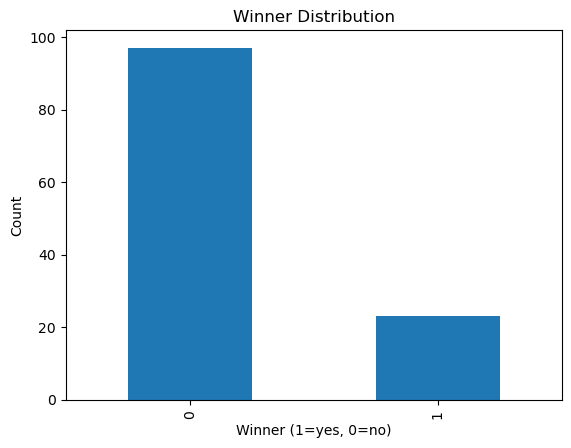

In [481]:
oscars_clean["winner"].value_counts().plot(kind="bar")
plt.title("Winner Distribution")
plt.xlabel("Winner (1=yes, 0=no)")
plt.ylabel("Count")
plt.show()


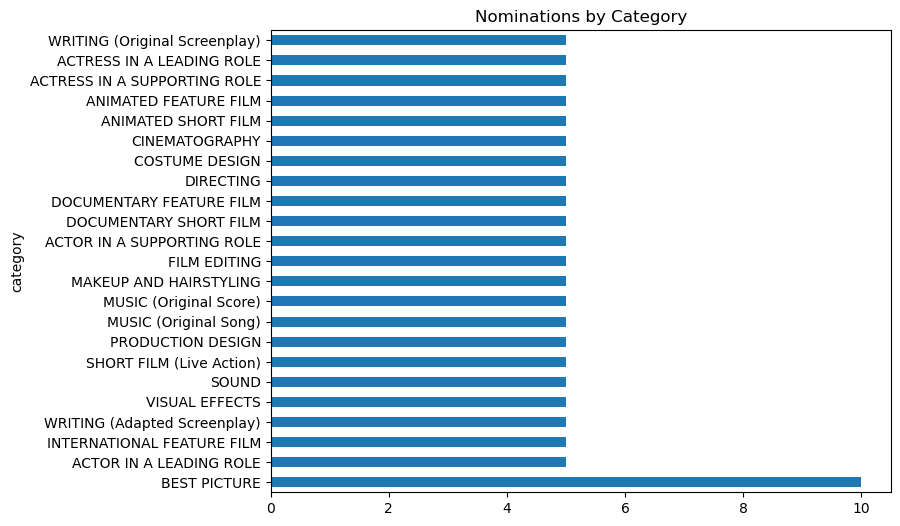

In [482]:
oscars_clean["category"].value_counts().plot(kind="barh", figsize=(8,6))
plt.title("Nominations by Category")
plt.show()


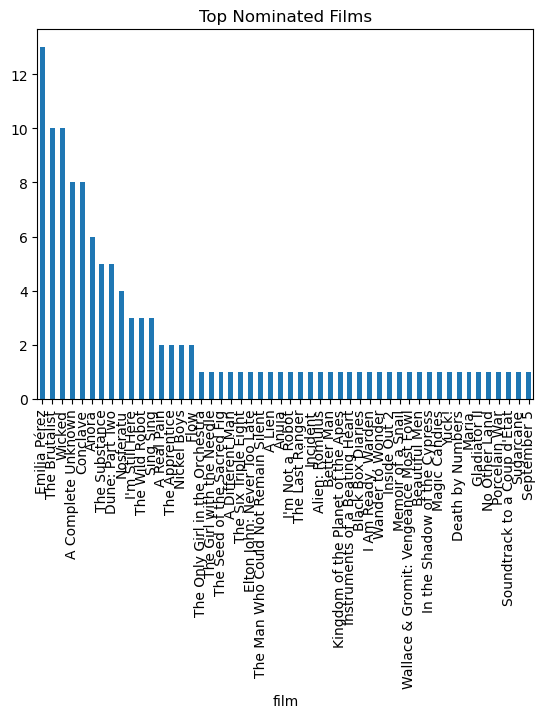

In [506]:
oscars_clean["film"].value_counts().plot(kind="bar")
plt.title("Top Nominated Films")
plt.show()


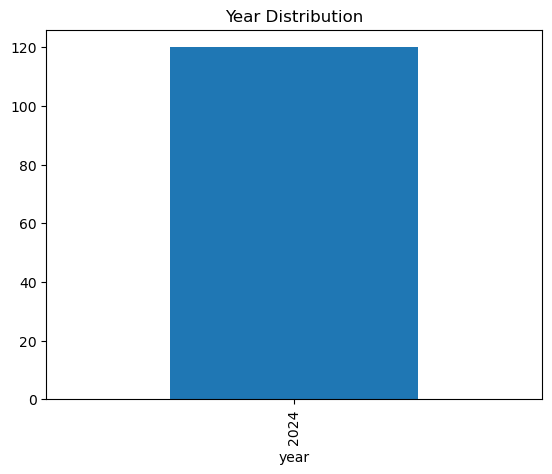

In [484]:
oscars_clean["year"].value_counts().plot(kind="bar")
plt.title("Year Distribution")
plt.show()


In [485]:
streaming_df.head()

,Name,Release Year,Poster,IMdbId,Streaming,Rent,Buy
0,The Brutalist,2024,https://images.justwatch.com/poster/326223302/...,tt8999762,"['HBO Max', 'HBO Max Amazon Channel']","['Plex ($3.99)', 'Amazon Video ($4.99)', 'Fand...",['Barnes & Noble ($29.99)']
1,A Complete Unknown,2024,https://images.justwatch.com/poster/323464854/...,tt11563598,"['Hulu', 'fuboTV', 'YouTube TV']","['Amazon Video ($3.99)', 'Google Play Movies (...",['Apple TV Store ($4.99)']
2,Sing Sing,2024,https://images.justwatch.com/poster/316460242/...,tt28479262,"['HBO Max', 'HBO Max Amazon Channel', 'History...","['Amazon Video ($4.99)', 'Fandango At Home ($4...",[]
3,The Apprentice,2024,https://images.justwatch.com/poster/321930797/...,tt8368368,"['Amazon Prime Video', 'Amazon Prime Video wit...","['Amazon Video ($1.99)', 'Apple TV Store ($1.9...","['Amazon DVD / Blu-ray ($None)', 'Barnes & Nob..."
4,Anora,2024,https://images.justwatch.com/poster/323065528/...,tt28607951,['Hulu'],"['Amazon Video ($3.99)', 'Apple TV Store ($3.9...",['Barnes & Noble ($29.99)']


In [486]:
streaming_df.shape

(41, 7)

In [487]:

streaming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          41 non-null     object
 1   Release Year  41 non-null     int64 
 2   Poster        40 non-null     object
 3   IMdbId        41 non-null     object
 4   Streaming     41 non-null     object
 5   Rent          41 non-null     object
 6   Buy           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.4+ KB


In [488]:
streaming_df.isna().sum()

Name            0
Release Year    0
Poster          1
IMdbId          0
Streaming       0
Rent            0
Buy             0
dtype: int64

In [489]:
streaming_clean = streaming_df.copy()

In [490]:
streaming_clean = streaming_clean.drop_duplicates()

In [507]:
streaming_clean.columns = (streaming_clean.columns.str.strip().str.lower() 
)
streaming_clean.columns = (streaming_clean.columns.str.replace(" ", "_")
)

streaming_clean.columns


Index(['name', 'release_year', 'poster', 'imdbid', 'streaming', 'rent', 'buy',
       'num_streaming'],
      dtype='object')

In [ ]:

list_cols = ["streaming", "rent", "buy"]

for col in list_cols:
    streaming_clean[col] = streaming_clean[col].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )


In [493]:
for col in list_cols:
    streaming_clean[col] = streaming_clean[col].apply(
        lambda x: x if isinstance(x, list) else []
    )


In [494]:
streaming_clean = streaming_clean.drop_duplicates(subset=["imdbid"])


In [495]:
streaming_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          41 non-null     object
 1   release_year  41 non-null     int64 
 2   poster        40 non-null     object
 3   imdbid        41 non-null     object
 4   streaming     41 non-null     object
 5   rent          41 non-null     object
 6   buy           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.4+ KB


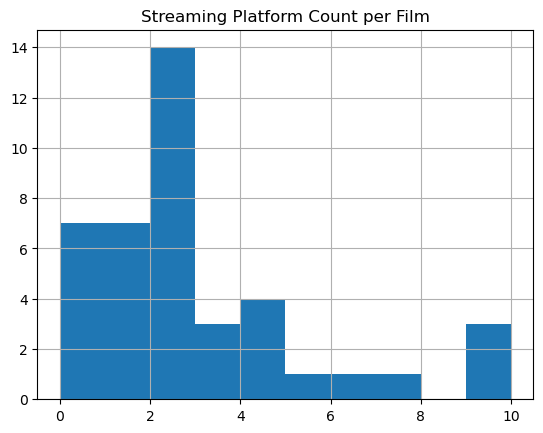

In [496]:
streaming_clean["num_streaming"] = streaming_clean["streaming"].apply(len)

streaming_clean["num_streaming"].hist()
plt.title("Streaming Platform Count per Film")
plt.show()


In [497]:
streaming_table = streaming_clean[["imdbid", "streaming"]].explode("streaming")
streaming_table.head()


,imdbid,streaming
0,tt8999762,HBO Max
0,tt8999762,HBO Max Amazon Channel
1,tt11563598,Hulu
1,tt11563598,fuboTV
1,tt11563598,YouTube TV


In [498]:
print("Missing values:")
print(streaming_clean.isna().sum())

print("\nDuplicates (imdbid):")
print(streaming_clean.duplicated(subset=["imdbid"]).sum())

print("\nData types:")
print(streaming_clean.dtypes)

print("\nShape:")
print(streaming_clean.shape)


Missing values:
name             0
release_year     0
poster           1
imdbid           0
streaming        0
rent             0
buy              0
num_streaming    0
dtype: int64

Duplicates (imdbid):
0

Data types:
name             object
release_year      int64
poster           object
imdbid           object
streaming        object
rent             object
buy              object
num_streaming     int64
dtype: object

Shape:
(41, 8)


In [499]:
streaming_clean["poster"] = streaming_clean["poster"].fillna("missing")
#ewplaced missing poster with missing, but this is not structual so should be okay

In [500]:
streaming_clean.sample(5)


,name,release_year,poster,imdbid,streaming,rent,buy,num_streaming
2,Sing Sing,2024,https://images.justwatch.com/poster/316460242/...,tt28479262,"[HBO Max, HBO Max Amazon Channel, History Vaul...","[Amazon Video ($4.99), Fandango At Home ($4.99...",[],5
10,Straume,2024,https://images.justwatch.com/poster/326396708/...,tt4772188,"[HBO Max, HBO Max Amazon Channel]","[Amazon Video ($2.99), Apple TV Store ($3.99),...","[Amazon DVD / Blu-ray ($None), Barnes & Noble ...",2
12,Memoir of a Snail,2024,https://images.justwatch.com/poster/326163828/...,tt23770030,"[Hulu, AMC Plus Apple TV Channel , AMC+ Amazon...","[Amazon Video ($2.99), Fandango At Home ($2.99...","[Amazon DVD / Blu-ray ($None), Barnes & Noble ...",6
1,A Complete Unknown,2024,https://images.justwatch.com/poster/323464854/...,tt11563598,"[Hulu, fuboTV, YouTube TV]","[Amazon Video ($3.99), Google Play Movies ($3....",[Apple TV Store ($4.99)],3
40,September 5,2024,missing,tt28082769,"[Amazon Prime Video, fuboTV, MGM+ Amazon Chann...","[Amazon Video ($5.99), Apple TV Store ($5.99),...","[Barnes & Noble ($20.29), Zavvi ($22.99)]",9


In [501]:
type(streaming_clean["streaming"].iloc[0]), type(streaming_clean["rent"].iloc[0]), type(streaming_clean["buy"].iloc[0])


(list, list, list)

In [502]:
(streaming_clean["streaming"].apply(len) == 0).sum(), \
(streaming_clean["rent"].apply(len) == 0).sum(), \
(streaming_clean["buy"].apply(len) == 0).sum()


(7, 12, 18)

In [503]:
streaming_clean["num_streaming"] = streaming_clean["streaming"].apply(len)
streaming_clean[["name", "streaming", "num_streaming"]].sample(5)


,name,streaming,num_streaming
25,Soundtrack to a Coup d'État,[Kino Film Collection],1
26,Sugarcane,"[Disney Plus, fuboTV, YouTube TV]",3
3,The Apprentice,"[Amazon Prime Video, Amazon Prime Video with Ads]",2
21,Gladiator II,"[Amazon Prime Video, fuboTV, MGM+ Amazon Chann...",10
19,Maria,"[Netflix, Netflix Standard with Ads]",2


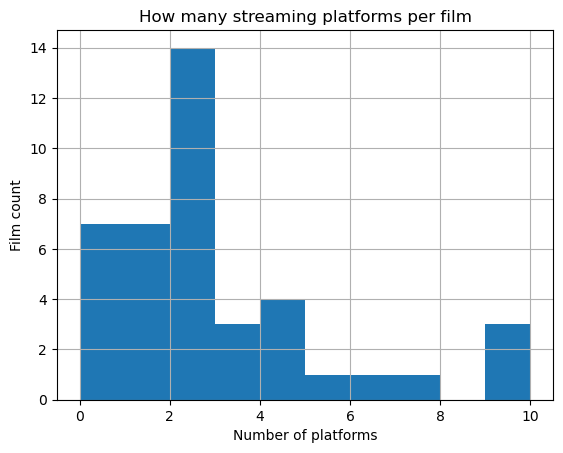

In [504]:
streaming_clean["num_streaming"].hist(bins=10)
plt.title("How many streaming platforms per film")
plt.xlabel("Number of platforms")
plt.ylabel("Film count")
plt.show()
